# Load Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Run `PyStacker`
Execute the `PyStacker` python script following the instructions in the `README.md` file. There are two options for input files:
* 1. `PyStructure` database file (a database in table format, which contains the ppv coordinates, line brightness temperatures and velocity field data).
* 2. `3D Fits data cubes` files (homogenized (i.e. same spatial and spectral resolution and reprojected to the same coordiante grid) `.fits` data cubes, including the line cubes and the velocity fields

# Step 2: Load stacking results
By default the stacked data is stored in the directory `./output/`. You can of course save the data in any other directory of your choice. Then, load the data from the accordant directory using `np.load()`.

In [5]:
dir_data = './output/'  # data directory
fname = 'ngc5194_data_struct_27as_stack_rgal_kpc.npy'  # stacking results file name

data_pystacker = np.load(dir_data + fname, allow_pickle=True).item()  # load stacking data

The loaded data `data_pystacker` contains a dictionary. You can list the keys as follows (the content of each key is explained in the documentation):

In [9]:
data_pystacker.keys()

dict_keys(['gal', 'tag', 'ra_deg', 'dec_deg', 'dist_mpc', 'posang_deg', 'incl_deg', 'beam_as', 'rgal_as', 'rgal_kpc', 'rgal_r25', 'theta_rad', 'vfield_kms', 'veltype', 'vaxis_kms', 'CO21_spec_K', 'xtype', 'xmin', 'xmid', 'xmax', 'mask', 'ncounts', 'narea_kpc2', 'ratio_usfpix', 'velcte_kms', 'ftype_CO21', 'fqual_CO21', 'rms_K_CO21', 'center_kms_CO21', 'peak_K_co21', 'fwhm_kms_fit_CO21', 'fwhm_kms_CO21', 'fwhm_lim_CO21', 'ii_K_kms_CO21', 'uc_ii_K_kms_CO21', 'limit_K_kms_CO21', 'coefs_cCO1', 'e_coefs_CO21', 'zero_offs_C=21', 'flag_CO21', '12CO21_spec_K', 'ftype_12CO21', 'fqual_12CO21', 'rms_K_12CO21', 'center_kms_12CO21', 'peak_K_12CO21', 'fwhm_kms_fit_12CO21', 'fwhm_kms_12CO21', 'fwhm_lim_12CO21', 'ii_K_kms_12CO21', 'uc_ii_K_kms_12CO21', 'limit_K_kms_12CO21', 'coefs_12CO21', 'e_coefs_12CO21', 'zero_offs_12CO21', 'flag_12CO21', '12CO10_spec_K', 'counts_12CO10', 'ncounts_12CO10', 'ncounts_total_12CO10', 'nbins', 'counts_12CO21', 'ncounts_12CO21', 'ncounts_total_12CO21', 'prior_mask', 'uppl

# Step 3: Plotting

## 3.1) Stacked Spectra

We can load the velocity axis (centred around the given velocity field) and the accordingly stacked spectrum of a `line` (and its rms uncertainty) via the following keys:
* `vaxis_kms`
* `<line>_spec_K`

Moreover, we can load the bin parameters (miminum, maximum, centre) in which the spectra where averages:
* `xmin`
* `xmax`
* `xmid`

`PyStacker` also computed the integrated intensities for each stacked spectrum, where it uses the prior line to create a velocity range over which the spectra are integrated, individually for each spectrum. We can load this velocity mask via:
* `prior_mask`

In [115]:
vaxis = data_pystacker['vaxis_kms']  # velocity axis
spec = data_pystacker['12CO21_spec_K']  # 12CO(2-1) brightness temperature [K]
spec_rms = data_pystacker['rms_K_12CO21']  # 12CO(2-1) brightness temperature uncertainty (rms) [K]

xmin = data_pystacker['xmin']  # bin minima
xmax = data_pystacker['xmax']  # bin maxima
xmid = data_pystacker['xmid']  # bin centre

prior_mask = data_pystacker['prior_mask']  # velocity mask over which the stacked spectra are integrated

Now, let us plot the stacked spectra. They should be centered around the zero-velocity (if the line emssion follows the given velocity field).

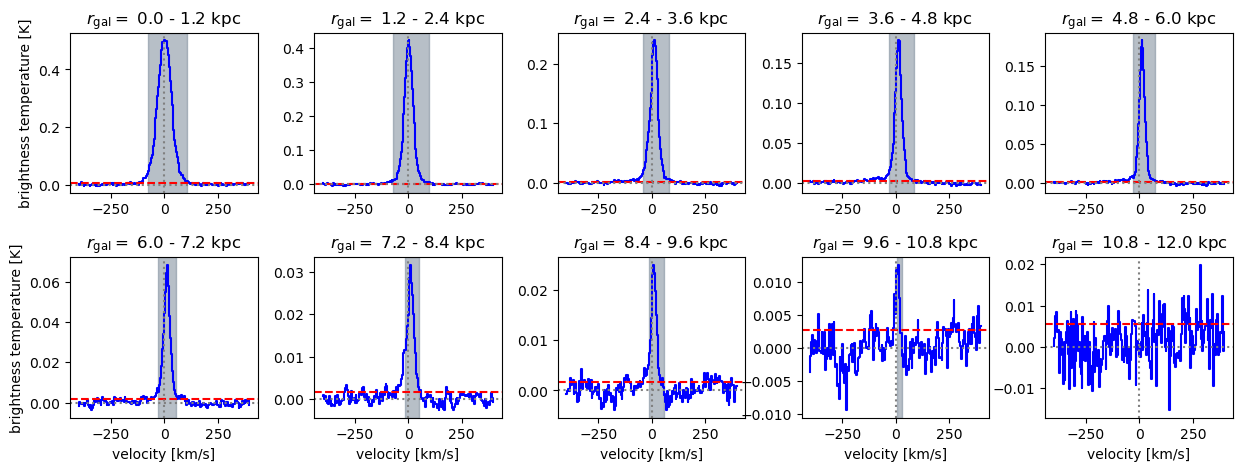

In [113]:
n = 10
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
for i in range(n):
    ax = plt.subplot(2, 5, i+1)
    ax.step(vaxis, spec[:,i], where='mid', color='b')  # plot spectra
    ax.axhline(spec_rms[i], color='r', ls='dashed')  # plot rms level
    vaxis_mask = vaxis[prior_mask[:,i]==1]  # select velocity range, where mask is true
    if len(vaxis_mask) > 0:
        ax.axvspan(vaxis_mask[0], vaxis_mask[-1], color='slategrey', alpha=0.5, zorder=0)  # plot prior mask
    ax.axhline(0, ls='dotted', c='grey')
    ax.axvline(0, ls='dotted', c='grey')
    if (i%5)==0:
        ax.set_ylabel('brightness temperature [K]')
    if i>=(n-5):
        ax.set_xlabel('velocity [km/s]')
    ax.set_title(r'$r_{\rm gal}=$ %.1f - %.1f kpc' % (xmin[i], xmax[i]))
plt.show()

Note: In this case, you should think about tuning the parameters for creating the velocity mask, i.e. the signal-to-noise ratio thresholds for the lower and upper mask that are used to create the mask.

## 3.2) Radial Profile

In this example, we have stacked in bins of galactocentric radius. Hence, we can plot the integrated intensities of each stacked spectrum against the galactocentric radius. The integrated intensitites and corresponding uncertainties are obtained as:
* `ii_K_kms_<line>`
* `uc_ii_K_kms_<line>`

In [126]:
ii_stacked = data_pystacker['ii_K_kms_12CO21'] # line integrated intensity [K km/s]
ii_stacked_uc = data_pystacker['uc_ii_K_kms_12CO21'] # line integrated intensity [K km/s]

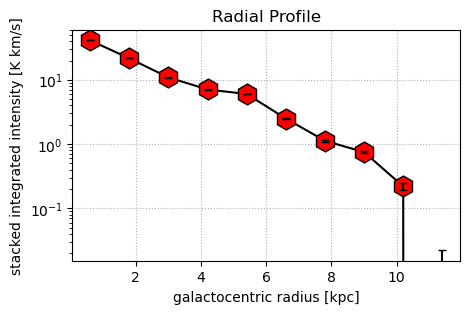

In [157]:
fig = plt.figure(figsize=(5,3))
ax = plt.subplot(111)
ax.plot(xmid, ii_stacked, color='k', marker='h', mfc='r', mec='k', ms=15)  # plot spectra
ax.errorbar(xmid, ii_stacked, yerr=ii_stacked_uc, ls='none', marker='None', color='k', capsize=3, zorder=5)
ax.set_yscale('log')
ax.set_title('Radial Profile')
ax.set_xlabel('galactocentric radius [kpc]')
ax.set_ylabel('stacked integrated intensity [K km/s]')
ax.grid(ls='dotted')
plt.show()

# Remarks
The stacking dictionary contains some more information, such as the peak temperature of each stacked spectrum `peak_K_<line>`, the signal-to-noise ratio of the stacked integrated intensities `SNR_<line>`, or the number of spectra `ncounts_<line>` contributing to the stacked spectrum. For more information on the dictionary keys, look up the documentation on GitHub.